In [351]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
from us import states
from pathlib import Path
%matplotlib inline

# Census & gmaps API Keys
api_key = os.getenv("CENSUS_API_KEY")
mapbox_key = os.getenv("MAPBOX_API_KEY")
c_2018 = Census(api_key, year=2018)
c_2017 = Census(api_key, year=2017)
c_2016 = Census(api_key, year=2016)
c_2015 = Census(api_key, year=2015)
c_2014 = Census(api_key, year=2014)
c_2013 = Census(api_key, year=2013)
c_2012 = Census(api_key, year=2012)
c_2011 = Census(api_key, year=2011)
c_2010 = Census(api_key, year=2010)
c_2009 = Census(api_key, year=2009)
c_2008 = Census(api_key, year=2008)
c_2007 = Census(api_key, year=2007)
c_2006 = Census(api_key, year=2006)
c_2005 = Census(api_key, year=2005)
c_2004 = Census(api_key, year=2004)

# Configure gmaps
# gmaps.configure(api_key=gkey)

In [352]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import style
import seaborn as sns
%matplotlib inline

style.use('ggplot')

In [353]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2018 = c_2018.acs1.get((
    
                                      "NAME", 
    
    "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E","B17001_002E","B23025_005E", 
    
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
                                          
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2018 = pd.DataFrame(census_data_occupation_by_gender_2018)

# Column Reordering
census_occupation_gender_pd_2018 = census_occupation_gender_pd_2018.rename(columns={
    
                                      "B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",
   
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})

# Add in Poverty Rate (Poverty Count / Population)
census_occupation_gender_pd_2018["Poverty Rate"] = 100 * \
    census_occupation_gender_pd_2018["Poverty Count"].astype(
        int) / census_occupation_gender_pd_2018["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_occupation_gender_pd_2018["Unemployment Rate"] = 100 * \
    census_occupation_gender_pd_2018["Unemployment Count"].astype(
        int) / census_occupation_gender_pd_2018["Population"].astype(int)


# Final DataFrame
census_occupation_gender_pd_2018 = census_occupation_gender_pd_2018[["State", "County", "Name", 
                                                                     
                            "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate",
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",
                                                                     
                      ]]

census_occupation_gender_pd_2018.head()

,State,County,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,Female_business_operations,Financial_specialists_female,Accountants_&_auditors_female,Computer_female,Female_data_scientits,Software_devops_female,Database_&_system_female,Information_age16+_total,Finance_and_insurance,Real_estate
0,36,061,"New York County, New York",1628701.0,37.6,85066.0,74911.0,245487.0,15.072564,2.864798,...,28125.0,10456.0,5911.0,8582.0,3479.0,2287.0,788.0,102490.0,155369.0,75746.0
1,36,047,"Kings County, New York",2582830.0,35.4,61220.0,34709.0,485693.0,18.804683,2.451923,...,26136.0,13903.0,10014.0,7838.0,1833.0,3085.0,898.0,81791.0,95951.0,55517.0
2,36,081,"Queens County, New York",2278906.0,39.2,69320.0,31866.0,258221.0,11.330919,2.740218,...,20702.0,13281.0,8501.0,4410.0,1862.0,1021.0,253.0,70033.0,75417.0,53848.0
3,36,005,"Bronx County, New York",1432132.0,34.4,38467.0,21712.0,383486.0,26.777280,4.719118,...,10163.0,3640.0,1985.0,1150.0,180.0,229.0,42.0,48870.0,56600.0,44457.0
4,36,085,"Richmond County, New York",476179.0,40.1,82166.0,35966.0,53741.0,11.285882,1.932257,...,5140.0,3495.0,2547.0,861.0,388.0,269.0,51.0,66497.0,90633.0,56397.0


In [354]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_occupation_gender_pd_2018.to_csv("census_occupation_gender_pd_2018.csv", encoding="utf-8", index=False)

In [355]:
census_occupation_gender_pd_2018.to_pickle("census_occupation_gender_pd_2018.pickle")

In [356]:
census_occupation_gender_pd_t2018 = census_occupation_gender_pd_2018.T
census_occupation_gender_pd_t2018.head()

,0,1,2,3,4
State,36,36,36,36,36
County,061,047,081,005,085
Name,"New York County, New York","Kings County, New York","Queens County, New York","Bronx County, New York","Richmond County, New York"
Population,1.6287e+06,2.58283e+06,2.27891e+06,1.43213e+06,476179
Median Age,37.6,35.4,39.2,34.4,40.1


In [357]:
census_occupation_gender_pd_t2018.to_csv("census_occupation_gender_pd_t2018.csv", encoding="utf-8", index=False)

In [358]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2017 = c_2017.acs1.get((
                                      "NAME", 
    
    "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E","B17001_002E","B23025_005E", 
    
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2017 = pd.DataFrame(census_data_occupation_by_gender_2017)

# Column Reordering
census_occupation_gender_pd_2017 = census_occupation_gender_pd_2017.rename(columns={
    
    
                                      "B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male Business Operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male Data Scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female Business Operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female Data Scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})

# Add in Poverty Rate (Poverty Count / Population)
census_occupation_gender_pd_2017["Poverty Rate"] = 100 * \
    census_occupation_gender_pd_2017["Poverty Count"].astype(
        int) / census_occupation_gender_pd_2017["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_occupation_gender_pd_2017["Unemployment Rate"] = 100 * \
    census_occupation_gender_pd_2017["Unemployment Count"].astype(
        int) / census_occupation_gender_pd_2017["Population"].astype(int)



# Final DataFrame
census_occupation_gender_pd_2017 = census_occupation_gender_pd_2017[["State", "County", "Name", 
                                                                     
                                "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate",
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male Business Operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male Data Scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female Business Operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female Data Scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",
      
                                                                     
                      ]]

census_occupation_gender_pd_2017.head()

,State,County,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,Female Business Operations,Financial_specialists_female,Accountants_&_auditors_female,Computer_female,Female Data Scientits,Software_devops_female,Database_&_system_female,Information_age16+_total,Finance_and_insurance,Real_estate
0,36,005,"Bronx County, New York",1471160.0,34.0,37397.0,20497.0,402384.0,27.351478,5.133500,...,9802.0,3983.0,2820.0,669.0,128.0,256.0,52.0,56132.0,51252.0,42358.0
1,36,047,"Kings County, New York",2648771.0,35.2,56942.0,32274.0,519803.0,19.624309,3.244826,...,29971.0,11816.0,8246.0,7172.0,1862.0,3866.0,472.0,76848.0,83993.0,50661.0
2,36,061,"New York County, New York",1664727.0,37.3,85071.0,72057.0,262482.0,15.767270,3.142677,...,27588.0,10637.0,4513.0,6463.0,2817.0,1592.0,280.0,81778.0,152116.0,67826.0
3,36,081,"Queens County, New York",2358582.0,38.7,64509.0,29857.0,282514.0,11.978129,2.725451,...,19595.0,13611.0,10803.0,3542.0,493.0,1731.0,189.0,66725.0,71971.0,51587.0
4,36,085,"Richmond County, New York",479458.0,40.4,79201.0,35205.0,55779.0,11.633761,2.066083,...,6012.0,2378.0,1715.0,1030.0,79.0,442.0,0.0,81082.0,86126.0,61064.0


In [359]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_occupation_gender_pd_2017.to_csv("census_occupation_gender_pd_2017.csv", encoding="utf-8", index=False)

In [360]:
census_occupation_gender_pd_2017.to_pickle("census_occupation_gender_pd_2017.pickle")

In [361]:
census_occupation_gender_pd_t2017 = census_occupation_gender_pd_2017.T
census_occupation_gender_pd_t2017.head()

,0,1,2,3,4
State,36,36,36,36,36
County,005,047,061,081,085
Name,"Bronx County, New York","Kings County, New York","New York County, New York","Queens County, New York","Richmond County, New York"
Population,1.47116e+06,2.64877e+06,1.66473e+06,2.35858e+06,479458
Median Age,34,35.2,37.3,38.7,40.4


In [362]:
census_occupation_gender_pd_t2017.to_csv("census_occupation_gender_pd_t2017.csv", encoding="utf-8", index=False)

In [363]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2016 = c_2016.acs1.get((
                                      "NAME", 
    
    "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E","B17001_002E","B23025_005E", 
    
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2016 = pd.DataFrame(census_data_occupation_by_gender_2016)

# Column Reordering
census_occupation_gender_pd_2016 = census_occupation_gender_pd_2016.rename(columns={
    
                                      "B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                    
                                      "NAME": "Name", "state": "State", "county":"County"})

# Add in Poverty Rate (Poverty Count / Population)
census_occupation_gender_pd_2016["Poverty Rate"] = 100 * \
    census_occupation_gender_pd_2016["Poverty Count"].astype(
        int) / census_occupation_gender_pd_2016["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_occupation_gender_pd_2016["Unemployment Rate"] = 100 * \
    census_occupation_gender_pd_2016["Unemployment Count"].astype(
        int) / census_occupation_gender_pd_2016["Population"].astype(int)



# Final DataFrame
census_occupation_gender_pd_2016 = census_occupation_gender_pd_2016[["State", "County", "Name", 
                                                                     
                                "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate",

                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",
                                 
                                                                     
                      ]]

census_occupation_gender_pd_2016.head()

,State,County,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,Female_business_operations,Financial_specialists_female,Accountants_&_auditors_female,Computer_female,Female_data_scientits,Software_devops_female,Database_&_system_female,Information_age16+_total,Finance_and_insurance,Real_estate
0,36,005,"Bronx County, New York",1455720.0,33.6,37525.0,19369.0,407377.0,27.984571,4.676174,...,9657.0,4453.0,3354.0,1421.0,228.0,306.0,179.0,47345.0,56403.0,36455.0
1,36,047,"Kings County, New York",2629150.0,34.8,55150.0,30526.0,536846.0,20.418995,3.585037,...,29008.0,10285.0,7518.0,7257.0,2182.0,2856.0,697.0,66775.0,81141.0,50558.0
2,36,061,"New York County, New York",1643734.0,37.1,77559.0,68126.0,275840.0,16.781304,3.197111,...,32227.0,13293.0,6755.0,7340.0,3163.0,1465.0,968.0,101820.0,151280.0,61718.0
3,36,081,"Queens County, New York",2333054.0,38.3,62207.0,28609.0,303895.0,13.025631,3.166493,...,22153.0,13697.0,9010.0,5565.0,1791.0,2150.0,287.0,61940.0,68988.0,46962.0
4,36,085,"Richmond County, New York",476015.0,39.7,77197.0,33559.0,62239.0,13.075008,2.352657,...,4115.0,1802.0,1265.0,932.0,93.0,355.0,0.0,84643.0,76780.0,60699.0


In [364]:
census_occupation_gender_pd_2016.to_csv("census_occupation_gender_pd_2016.csv", encoding="utf-8", index=False)

In [365]:
census_occupation_gender_pd_2016.to_pickle("census_occupation_gender_pd_2016.pickle")

In [366]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2015 = c_2015.acs1.get((
                                      "NAME", 
    
    "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E","B17001_002E","B23025_005E", 
    
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2015 = pd.DataFrame(census_data_occupation_by_gender_2015)

# Column Reordering
census_occupation_gender_pd_2015 = census_occupation_gender_pd_2015.rename(columns={
    
                                      "B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                       
                                      "NAME": "Name", "state": "State", "county":"County"})

# Add in Poverty Rate (Poverty Count / Population)
census_occupation_gender_pd_2015["Poverty Rate"] = 100 * \
    census_occupation_gender_pd_2015["Poverty Count"].astype(
        int) / census_occupation_gender_pd_2015["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_occupation_gender_pd_2015["Unemployment Rate"] = 100 * \
    census_occupation_gender_pd_2015["Unemployment Count"].astype(
        int) / census_occupation_gender_pd_2015["Population"].astype(int)



# Final DataFrame
census_occupation_gender_pd_2015 = census_occupation_gender_pd_2015[["State", "County", "Name", 

                                "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate",
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2015.head()

,State,County,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,Female_business_operations,Financial_specialists_female,Accountants_&_auditors_female,Computer_female,Female_data_scientits,Software_devops_female,Database_&_system_female,Information_age16+_total,Finance_and_insurance,Real_estate
0,36,005,"Bronx County, New York",1455444.0,33.6,35176.0,18880.0,432177.0,29.693825,4.962197,...,9063.0,3929.0,2186.0,1402.0,146.0,370.0,187.0,49735.0,58408.0,40829.0
1,36,047,"Kings County, New York",2636735.0,34.7,51141.0,28898.0,582808.0,22.103397,3.859356,...,24991.0,11658.0,7740.0,5038.0,856.0,3114.0,486.0,70623.0,82153.0,50572.0
2,36,061,"New York County, New York",1644518.0,36.8,75575.0,67255.0,280406.0,17.050954,3.611879,...,27349.0,11651.0,7083.0,6230.0,1951.0,2480.0,258.0,91561.0,152425.0,70052.0
3,36,081,"Queens County, New York",2339150.0,38.1,60422.0,27778.0,318154.0,13.601265,3.591689,...,19623.0,14109.0,9878.0,4546.0,1108.0,2016.0,252.0,61312.0,70638.0,45906.0
4,36,085,"Richmond County, New York",474558.0,39.8,71622.0,31284.0,67312.0,14.184146,2.492003,...,4083.0,2988.0,1752.0,719.0,105.0,330.0,36.0,47398.0,80242.0,49748.0


In [367]:
census_occupation_gender_pd_2015.to_csv("census_occupation_gender_pd_2015.csv", encoding="utf-8", index=False)

In [368]:
census_occupation_gender_pd_2015.to_pickle("census_occupation_gender_pd_2015.pickle")

In [369]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2014 = c_2014.acs1.get((
                                      "NAME", 
    
    "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E","B17001_002E","B23025_005E", 
    
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2014 = pd.DataFrame(census_data_occupation_by_gender_2014)

# Column Reordering
census_occupation_gender_pd_2014 = census_occupation_gender_pd_2014.rename(columns={
    
                                      "B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})

# Add in Poverty Rate (Poverty Count / Population)
census_occupation_gender_pd_2014["Poverty Rate"] = 100 * \
    census_occupation_gender_pd_2014["Poverty Count"].astype(
        int) / census_occupation_gender_pd_2014["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_occupation_gender_pd_2014["Unemployment Rate"] = 100 * \
    census_occupation_gender_pd_2014["Unemployment Count"].astype(
        int) / census_occupation_gender_pd_2014["Population"].astype(int)


# Final DataFrame
census_occupation_gender_pd_2014 = census_occupation_gender_pd_2014[["State", "County", "Name", 
                                                                     
                                "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate",

                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                                                     
                      ]]

census_occupation_gender_pd_2014.head()

,State,County,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,Female_business_operations,Financial_specialists_female,Accountants_&_auditors_female,Computer_female,Female_data_scientits,Software_devops_female,Database_&_system_female,Information_age16+_total,Finance_and_insurance,Real_estate
0,36,005,"Bronx County, New York",1438159.0,33.4,33712.0,18158.0,442188.0,30.746809,5.378334,...,10312.0,3024.0,1723.0,1229.0,418.0,198.0,40.0,51712.0,54105.0,36967.0
1,36,047,"Kings County, New York",2621793.0,34.5,47966.0,27059.0,607856.0,23.184744,4.288859,...,26220.0,8698.0,5122.0,5934.0,1152.0,2549.0,330.0,66690.0,76623.0,46028.0
2,36,061,"New York County, New York",1636268.0,36.6,76089.0,64618.0,279428.0,17.077154,3.832074,...,25739.0,14898.0,6516.0,5634.0,1961.0,2584.0,356.0,81318.0,140848.0,55872.0
3,36,081,"Queens County, New York",2321580.0,37.8,57241.0,26572.0,349127.0,15.038336,4.012569,...,19918.0,13265.0,8608.0,4863.0,1605.0,1709.0,329.0,58177.0,66506.0,46267.0
4,36,085,"Richmond County, New York",473279.0,39.7,71121.0,31611.0,67755.0,14.316080,2.892586,...,3542.0,1606.0,1164.0,787.0,32.0,633.0,122.0,65244.0,75817.0,51686.0


In [370]:
census_occupation_gender_pd_2014.to_csv("census_occupation_gender_pd_2014.csv", encoding="utf-8", index=False)

In [371]:
census_occupation_gender_pd_2014.to_pickle("census_occupation_gender_pd_2014.pickle")

In [372]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2013 = c_2013.acs1.get((
                                      "NAME", 
    
    "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E","B17001_002E","B23025_005E", 
    
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
                             ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2013 = pd.DataFrame(census_data_occupation_by_gender_2013)

# Column Reordering
census_occupation_gender_pd_2013 = census_occupation_gender_pd_2013.rename(columns={
    
                                      "B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                        
                                      "NAME": "Name", "state": "State", "county":"County"})

# Add in Poverty Rate (Poverty Count / Population)
census_occupation_gender_pd_2013["Poverty Rate"] = 100 * \
    census_occupation_gender_pd_2013["Poverty Count"].astype(
        int) / census_occupation_gender_pd_2013["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_occupation_gender_pd_2013["Unemployment Rate"] = 100 * \
    census_occupation_gender_pd_2013["Unemployment Count"].astype(
        int) / census_occupation_gender_pd_2013["Population"].astype(int)


# Final DataFrame
census_occupation_gender_pd_2013 = census_occupation_gender_pd_2013[["State", "County", "Name", 
                                                                     
                                "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate",
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",                                                                    
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2013.head()

,State,County,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,Female_business_operations,Financial_specialists_female,Accountants_&_auditors_female,Computer_female,Female_data_scientits,Software_devops_female,Database_&_system_female,Information_age16+_total,Finance_and_insurance,Real_estate
0,36,005,"Bronx County, New York",1418733.0,33.3,33009.0,17907.0,425977.0,30.025170,6.634088,...,7073.0,4596.0,2356.0,721.0,327.0,0.0,112.0,47418.0,51529.0,40117.0
1,36,047,"Kings County, New York",2592149.0,34.4,47520.0,26641.0,599001.0,23.108278,5.208111,...,19782.0,11266.0,8364.0,5721.0,1345.0,2744.0,478.0,64921.0,71447.0,43710.0
2,36,061,"New York County, New York",1626159.0,36.7,72190.0,63336.0,299254.0,18.402506,4.375525,...,24596.0,13645.0,7444.0,7242.0,1942.0,3490.0,678.0,100581.0,135143.0,56643.0
3,36,081,"Queens County, New York",2296175.0,37.7,56599.0,26463.0,347863.0,15.149673,4.674252,...,18508.0,14374.0,11997.0,5465.0,1539.0,2436.0,328.0,61067.0,66168.0,42583.0
4,36,085,"Richmond County, New York",472621.0,39.6,69633.0,32375.0,59539.0,12.597621,3.518041,...,3361.0,2190.0,1438.0,1282.0,372.0,660.0,0.0,64988.0,85963.0,51220.0


In [373]:
census_occupation_gender_pd_2013.to_csv("census_occupation_gender_pd_2013.csv", encoding="utf-8", index=False)

In [374]:
census_occupation_gender_pd_2013.to_pickle("census_occupation_gender_pd_2013.pickle")

In [375]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2012 = c_2012.acs1.get((
                                      "NAME", 
    
    "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E","B17001_002E","B23025_005E", 
    
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2012 = pd.DataFrame(census_data_occupation_by_gender_2012)

# Column Reordering
census_occupation_gender_pd_2012 = census_occupation_gender_pd_2012.rename(columns={
    
                                      "B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})

# Add in Poverty Rate (Poverty Count / Population)
census_occupation_gender_pd_2012["Poverty Rate"] = 100 * \
    census_occupation_gender_pd_2012["Poverty Count"].astype(
        int) / census_occupation_gender_pd_2012["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_occupation_gender_pd_2012["Unemployment Rate"] = 100 * \
    census_occupation_gender_pd_2012["Unemployment Count"].astype(
        int) / census_occupation_gender_pd_2012["Population"].astype(int)


# Final DataFrame
census_occupation_gender_pd_2012 = census_occupation_gender_pd_2012[["State", "County", "Name", 
                                                                     
                                "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate",
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",
                                                                     
                      ]]

census_occupation_gender_pd_2012.head()

,State,County,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,Female_business_operations,Financial_specialists_female,Accountants_&_auditors_female,Computer_female,Female_data_scientits,Software_devops_female,Database_&_system_female,Information_age16+_total,Finance_and_insurance,Real_estate
0,36,005,"Bronx County, New York",1408473.0,33.0,32460.0,17603.0,426381.0,30.272572,7.057927,...,8419.0,4782.0,4142.0,1205.0,349.0,313.0,61.0,47232.0,46263.0,37168.0
1,36,047,"Kings County, New York",2565635.0,34.2,45230.0,24190.0,619707.0,24.154137,5.523779,...,21115.0,11310.0,8056.0,5102.0,935.0,2676.0,637.0,61247.0,67130.0,42290.0
2,36,061,"New York County, New York",1619090.0,36.5,67099.0,60290.0,279290.0,17.249813,5.178403,...,24867.0,13628.0,8516.0,6266.0,2155.0,2491.0,384.0,81182.0,121952.0,60391.0
3,36,081,"Queens County, New York",2272771.0,37.5,54713.0,25352.0,363869.0,16.009928,5.080626,...,17763.0,12281.0,9642.0,4155.0,1929.0,1310.0,259.0,62493.0,61281.0,45761.0
4,36,085,"Richmond County, New York",470728.0,38.9,70963.0,29939.0,54028.0,11.477541,3.416835,...,4056.0,2989.0,2614.0,1382.0,325.0,746.0,82.0,71715.0,72199.0,50825.0


In [376]:
census_occupation_gender_pd_2012.to_csv("census_occupation_gender_pd_2012.csv", encoding="utf-8", index=False)

In [377]:
census_occupation_gender_pd_2012.to_pickle("census_occupation_gender_pd_2012.pickle")

In [378]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2011 = c_2011.acs1.get((
                                      "NAME", 
    
    "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E","B17001_002E","B23025_005E", 
    
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
                             ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2011 = pd.DataFrame(census_data_occupation_by_gender_2011)

# Column Reordering
census_occupation_gender_pd_2011 = census_occupation_gender_pd_2011.rename(columns={
    
                                      "B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      
                                      "NAME": "Name", "state": "State", "county":"County"})

# Add in Poverty Rate (Poverty Count / Population)
census_occupation_gender_pd_2011["Poverty Rate"] = 100 * \
    census_occupation_gender_pd_2011["Poverty Count"].astype(
        int) / census_occupation_gender_pd_2011["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_occupation_gender_pd_2011["Unemployment Rate"] = 100 * \
    census_occupation_gender_pd_2011["Unemployment Count"].astype(
        int) / census_occupation_gender_pd_2011["Population"].astype(int)

# Final DataFrame
census_occupation_gender_pd_2011 = census_occupation_gender_pd_2011[["State", "County", "Name", 
                                                                     
                                "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate",
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2011.head()

,State,County,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,Female_business_operations,Financial_specialists_female,Accountants_&_auditors_female,Computer_female,Female_data_scientits,Software_devops_female,Database_&_system_female,Information_age16+_total,Finance_and_insurance,Real_estate
0,36,005,"Bronx County, New York",1392002.0,32.8,32058.0,16879.0,412139.0,29.607644,7.484903,...,5782.0,4054.0,2772.0,646.0,191.0,182.0,44.0,51105.0,47753.0,41363.0
1,36,047,"Kings County, New York",2532645.0,34.2,42752.0,23577.0,592789.0,23.405925,5.895023,...,18439.0,9384.0,6690.0,5266.0,1101.0,2526.0,201.0,58461.0,66901.0,39610.0
2,36,061,"New York County, New York",1601948.0,36.5,66299.0,59398.0,284572.0,17.764122,5.195674,...,21930.0,13585.0,7661.0,4919.0,1497.0,1650.0,669.0,71553.0,133754.0,52790.0
3,36,081,"Queens County, New York",2247848.0,37.4,53572.0,25088.0,351223.0,15.624855,5.203377,...,16688.0,12396.0,9379.0,4813.0,566.0,2046.0,866.0,60613.0,58618.0,45048.0
4,36,085,"Richmond County, New York",470467.0,38.6,70578.0,30274.0,54365.0,11.555539,3.935026,...,2950.0,1964.0,1705.0,935.0,75.0,596.0,0.0,71498.0,65113.0,56311.0


In [379]:
census_occupation_gender_pd_2011.to_csv("census_occupation_gender_pd_2011.csv", encoding="utf-8", index=False)

In [380]:
census_occupation_gender_pd_2011.to_pickle("census_occupation_gender_pd_2011.pickle")

In [381]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2010 = c_2010.acs1.get((
                                      "NAME", 
    
    "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E","B17001_002E",#"B23025_005E", 
    
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
                             ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2010 = pd.DataFrame(census_data_occupation_by_gender_2010)

# Column Reordering
census_occupation_gender_pd_2010 = census_occupation_gender_pd_2010.rename(columns={
    
                                      "B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      #"B23025_005E": "Unemployment Count",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})

# Add in Poverty Rate (Poverty Count / Population)
census_occupation_gender_pd_2010["Poverty Rate"] = 100 * \
    census_occupation_gender_pd_2010["Poverty Count"].astype(
        int) / census_occupation_gender_pd_2010["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
#census_occupation_gender_pd_2010["Unemployment Rate"] = 100 * \
#    census_occupation_gender_pd_2010["Unemployment Count"].astype(
#        int) / census_occupation_gender_pd_2010["Population"].astype(int)


# Final DataFrame
census_occupation_gender_pd_2010 = census_occupation_gender_pd_2010[["State", "County", "Name", 
                                                                     
                                "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", #"Unemployment Rate",
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",
                                                                     
                      ]]

census_occupation_gender_pd_2010.head()

,State,County,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Employed_age16+_civilian,...,Female_business_operations,Financial_specialists_female,Accountants_&_auditors_female,Computer_female,Female_data_scientits,Software_devops_female,Database_&_system_female,Information_age16+_total,Finance_and_insurance,Real_estate
0,36,005,"Bronx County, New York",1386657.0,32.8,32568.0,16671.0,408584.0,29.465398,382642.0,...,7826.0,4344.0,3544.0,926.0,356.0,362.0,0.0,49090.0,45770.0,39340.0
1,36,047,"Kings County, New York",2508340.0,34.2,42143.0,23218.0,571936.0,22.801375,793298.0,...,17396.0,10787.0,7354.0,4383.0,733.0,2111.0,585.0,56023.0,60058.0,41348.0
2,36,061,"New York County, New York",1586698.0,36.4,63832.0,56556.0,254289.0,16.026301,604865.0,...,22052.0,13964.0,7023.0,3815.0,2044.0,1090.0,352.0,82014.0,125112.0,42421.0
3,36,081,"Queens County, New York",2233841.0,37.3,53054.0,24530.0,332165.0,14.869680,763128.0,...,15249.0,13008.0,9999.0,3256.0,810.0,1310.0,199.0,52500.0,61474.0,42878.0
4,36,085,"Richmond County, New York",469363.0,38.7,70560.0,30122.0,54353.0,11.580163,151120.0,...,4390.0,1931.0,1726.0,1021.0,134.0,765.0,80.0,65619.0,66770.0,70510.0


In [382]:
census_occupation_gender_pd_2010.to_pickle("census_occupation_gender_pd_2010.pickle")

In [383]:
census_occupation_gender_pd_2010.to_csv("census_occupation_gender_pd_2010.csv", encoding="utf-8", index=False)

In [384]:
employed_df_2018 = pd.DataFrame()

employed_df_2018['Year']= [2018, 2018, 2018, 2018, 2018]
employed_df_2018['Name']=census_occupation_gender_pd_2018['Name']
employed_df_2018['County']=census_occupation_gender_pd_2018['County']
employed_df_2018['Financial_specialists_male']=census_occupation_gender_pd_2018['Financial_specialists_male']
employed_df_2018['Financial_specialists_female']=census_occupation_gender_pd_2018['Financial_specialists_female']

employed_df_2018.head()

,Year,Name,County,Financial_specialists_male,Financial_specialists_female
0,2018,"New York County, New York",061,22645.0,10456.0
1,2018,"Kings County, New York",047,11139.0,13903.0
2,2018,"Queens County, New York",081,11494.0,13281.0
3,2018,"Bronx County, New York",005,2336.0,3640.0
4,2018,"Richmond County, New York",085,3342.0,3495.0


In [385]:
employed_df_2018.set_index(['County','Year', 'Name'], inplace=True)
employed_df_2018

,,,Financial_specialists_male,Financial_specialists_female
County,Year,Name,,
061,2018,"New York County, New York",22645.0,10456.0
047,2018,"Kings County, New York",11139.0,13903.0
081,2018,"Queens County, New York",11494.0,13281.0
005,2018,"Bronx County, New York",2336.0,3640.0
085,2018,"Richmond County, New York",3342.0,3495.0


In [386]:
employed_df_2017 = pd.DataFrame()

employed_df_2017['Year']= [2017, 2017, 2017, 2017, 2017]
employed_df_2017['Name']=census_occupation_gender_pd_2017['Name']
employed_df_2017['County']=census_occupation_gender_pd_2017['County']
employed_df_2017['Financial_specialists_male']=census_occupation_gender_pd_2017['Financial_specialists_male'] #index starts from 0
employed_df_2017['Financial_specialists_female']=census_occupation_gender_pd_2017['Financial_specialists_female']

employed_df_2017

,Year,Name,County,Financial_specialists_male,Financial_specialists_female
0,2017,"Bronx County, New York",005,2950.0,3983.0
1,2017,"Kings County, New York",047,11608.0,11816.0
2,2017,"New York County, New York",061,28096.0,10637.0
3,2017,"Queens County, New York",081,14777.0,13611.0
4,2017,"Richmond County, New York",085,3274.0,2378.0


In [387]:
employed_df_2017.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2017

,,,Financial_specialists_male,Financial_specialists_female
County,Year,Name,,
005,2017,"Bronx County, New York",2950.0,3983.0
047,2017,"Kings County, New York",11608.0,11816.0
061,2017,"New York County, New York",28096.0,10637.0
081,2017,"Queens County, New York",14777.0,13611.0
085,2017,"Richmond County, New York",3274.0,2378.0


In [388]:
employed_df_2016 = pd.DataFrame()

employed_df_2016['Year']= [2016, 2016, 2016, 2016, 2016]
employed_df_2016['Name']=census_occupation_gender_pd_2016['Name']
employed_df_2016['County']=census_occupation_gender_pd_2016['County']
employed_df_2016['Financial_specialists_male']=census_occupation_gender_pd_2016['Financial_specialists_male']
employed_df_2016['Financial_specialists_female']=census_occupation_gender_pd_2016['Financial_specialists_female']

employed_df_2016.head()

,Year,Name,County,Financial_specialists_male,Financial_specialists_female
0,2016,"Bronx County, New York",005,3171.0,4453.0
1,2016,"Kings County, New York",047,11162.0,10285.0
2,2016,"New York County, New York",061,23648.0,13293.0
3,2016,"Queens County, New York",081,12805.0,13697.0
4,2016,"Richmond County, New York",085,3704.0,1802.0


In [389]:
employed_df_2016.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2016

,,,Financial_specialists_male,Financial_specialists_female
County,Year,Name,,
005,2016,"Bronx County, New York",3171.0,4453.0
047,2016,"Kings County, New York",11162.0,10285.0
061,2016,"New York County, New York",23648.0,13293.0
081,2016,"Queens County, New York",12805.0,13697.0
085,2016,"Richmond County, New York",3704.0,1802.0


In [390]:
employed_df_2015 = pd.DataFrame()

employed_df_2015['Year']= [2015, 2015, 2015, 2015, 2015]
employed_df_2015['Name']=census_occupation_gender_pd_2015['Name']
employed_df_2015['County']=census_occupation_gender_pd_2015['County']
employed_df_2015['Financial_specialists_male']=census_occupation_gender_pd_2015['Financial_specialists_male']
employed_df_2015['Financial_specialists_female']=census_occupation_gender_pd_2015['Financial_specialists_female']

employed_df_2015.head()

,Year,Name,County,Financial_specialists_male,Financial_specialists_female
0,2015,"Bronx County, New York",005,2852.0,3929.0
1,2015,"Kings County, New York",047,10096.0,11658.0
2,2015,"New York County, New York",061,22486.0,11651.0
3,2015,"Queens County, New York",081,13864.0,14109.0
4,2015,"Richmond County, New York",085,2924.0,2988.0


In [391]:
employed_df_2015.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2015

,,,Financial_specialists_male,Financial_specialists_female
County,Year,Name,,
005,2015,"Bronx County, New York",2852.0,3929.0
047,2015,"Kings County, New York",10096.0,11658.0
061,2015,"New York County, New York",22486.0,11651.0
081,2015,"Queens County, New York",13864.0,14109.0
085,2015,"Richmond County, New York",2924.0,2988.0


In [392]:
employed_df_2014 = pd.DataFrame()

employed_df_2014['Year']= [2014, 2014, 2014, 2014, 2014]
employed_df_2014['Name']=census_occupation_gender_pd_2014['Name']
employed_df_2014['County']=census_occupation_gender_pd_2014['County']
employed_df_2014['Financial_specialists_male']=census_occupation_gender_pd_2014['Financial_specialists_male']
employed_df_2014['Financial_specialists_female']=census_occupation_gender_pd_2014['Financial_specialists_female']

employed_df_2014.head()

,Year,Name,County,Financial_specialists_male,Financial_specialists_female
0,2014,"Bronx County, New York",005,3252.0,3024.0
1,2014,"Kings County, New York",047,11821.0,8698.0
2,2014,"New York County, New York",061,21701.0,14898.0
3,2014,"Queens County, New York",081,11948.0,13265.0
4,2014,"Richmond County, New York",085,3114.0,1606.0


In [393]:
employed_df_2014.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2014

,,,Financial_specialists_male,Financial_specialists_female
County,Year,Name,,
005,2014,"Bronx County, New York",3252.0,3024.0
047,2014,"Kings County, New York",11821.0,8698.0
061,2014,"New York County, New York",21701.0,14898.0
081,2014,"Queens County, New York",11948.0,13265.0
085,2014,"Richmond County, New York",3114.0,1606.0


In [394]:
employed_df_2013 = pd.DataFrame()

employed_df_2013['Year']= [2013, 2013, 2013, 2013, 2013]
employed_df_2013['Name']=census_occupation_gender_pd_2013['Name']
employed_df_2013['County']=census_occupation_gender_pd_2013['County']
employed_df_2013['Financial_specialists_male']=census_occupation_gender_pd_2013['Financial_specialists_male']
employed_df_2013['Financial_specialists_female']=census_occupation_gender_pd_2013['Financial_specialists_female']

employed_df_2013.head()

,Year,Name,County,Financial_specialists_male,Financial_specialists_female
0,2013,"Bronx County, New York",005,1974.0,4596.0
1,2013,"Kings County, New York",047,10765.0,11266.0
2,2013,"New York County, New York",061,23033.0,13645.0
3,2013,"Queens County, New York",081,12428.0,14374.0
4,2013,"Richmond County, New York",085,3765.0,2190.0


In [395]:
employed_df_2013.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2013

,,,Financial_specialists_male,Financial_specialists_female
County,Year,Name,,
005,2013,"Bronx County, New York",1974.0,4596.0
047,2013,"Kings County, New York",10765.0,11266.0
061,2013,"New York County, New York",23033.0,13645.0
081,2013,"Queens County, New York",12428.0,14374.0
085,2013,"Richmond County, New York",3765.0,2190.0


In [396]:
employed_df_2012 = pd.DataFrame()

employed_df_2012['Year']= [2012, 2012, 2012, 2012, 2012]
employed_df_2012['Name']=census_occupation_gender_pd_2012['Name']
employed_df_2012['County']=census_occupation_gender_pd_2012['County']
employed_df_2012['Financial_specialists_male']=census_occupation_gender_pd_2012['Financial_specialists_male']
employed_df_2012['Financial_specialists_female']=census_occupation_gender_pd_2012['Financial_specialists_female']

employed_df_2012.head()

,Year,Name,County,Financial_specialists_male,Financial_specialists_female
0,2012,"Bronx County, New York",005,2559.0,4782.0
1,2012,"Kings County, New York",047,10900.0,11310.0
2,2012,"New York County, New York",061,25304.0,13628.0
3,2012,"Queens County, New York",081,12352.0,12281.0
4,2012,"Richmond County, New York",085,2745.0,2989.0


In [397]:
employed_df_2012.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2012

,,,Financial_specialists_male,Financial_specialists_female
County,Year,Name,,
005,2012,"Bronx County, New York",2559.0,4782.0
047,2012,"Kings County, New York",10900.0,11310.0
061,2012,"New York County, New York",25304.0,13628.0
081,2012,"Queens County, New York",12352.0,12281.0
085,2012,"Richmond County, New York",2745.0,2989.0


In [398]:
employed_df_2011 = pd.DataFrame()

employed_df_2011['Year']= [2011, 2011, 2011, 2011, 2011]
employed_df_2011['Name']=census_occupation_gender_pd_2011['Name']
employed_df_2011['County']=census_occupation_gender_pd_2011['County']
employed_df_2011['Financial_specialists_male']=census_occupation_gender_pd_2011['Financial_specialists_male']
employed_df_2011['Financial_specialists_female']=census_occupation_gender_pd_2011['Financial_specialists_female']

employed_df_2011.head()

,Year,Name,County,Financial_specialists_male,Financial_specialists_female
0,2011,"Bronx County, New York",005,3036.0,4054.0
1,2011,"Kings County, New York",047,12407.0,9384.0
2,2011,"New York County, New York",061,26440.0,13585.0
3,2011,"Queens County, New York",081,12283.0,12396.0
4,2011,"Richmond County, New York",085,3572.0,1964.0


In [399]:
employed_df_2011.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2011

,,,Financial_specialists_male,Financial_specialists_female
County,Year,Name,,
005,2011,"Bronx County, New York",3036.0,4054.0
047,2011,"Kings County, New York",12407.0,9384.0
061,2011,"New York County, New York",26440.0,13585.0
081,2011,"Queens County, New York",12283.0,12396.0
085,2011,"Richmond County, New York",3572.0,1964.0


In [400]:
employed_df_2010 = pd.DataFrame()

employed_df_2010['Year']= [2010, 2010, 2010, 2010, 2010]
employed_df_2010['Name']=census_occupation_gender_pd_2010['Name']
employed_df_2010['County']=census_occupation_gender_pd_2010['County']
employed_df_2010['Financial_specialists_male']=census_occupation_gender_pd_2010['Financial_specialists_male']
employed_df_2010['Financial_specialists_female']=census_occupation_gender_pd_2010['Financial_specialists_female']

employed_df_2010.head()

,Year,Name,County,Financial_specialists_male,Financial_specialists_female
0,2010,"Bronx County, New York",005,2922.0,4344.0
1,2010,"Kings County, New York",047,10578.0,10787.0
2,2010,"New York County, New York",061,22505.0,13964.0
3,2010,"Queens County, New York",081,12474.0,13008.0
4,2010,"Richmond County, New York",085,2906.0,1931.0


In [401]:
employed_df_2010.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2010

,,,Financial_specialists_male,Financial_specialists_female
County,Year,Name,,
005,2010,"Bronx County, New York",2922.0,4344.0
047,2010,"Kings County, New York",10578.0,10787.0
061,2010,"New York County, New York",22505.0,13964.0
081,2010,"Queens County, New York",12474.0,13008.0
085,2010,"Richmond County, New York",2906.0,1931.0


In [402]:
#employed_df_2018 = employed_df_2018.set_index.County #now index set to 'County'

#option 1
#keep index of t
#employed_df_2018.index = employed_df_2017.index 

#option 2
#index of employed_df_2017 starts from 0
#employed_df_2017.reset_index(drop=True, inplace=True)

#now concat will keep number of rows 
financial_specialists = pd.concat(
                                    [employed_df_2010, employed_df_2011, employed_df_2012, employed_df_2013, 
                                     employed_df_2014, employed_df_2015, employed_df_2016, employed_df_2017, employed_df_2018], 
                                     join='inner', axis="rows").sort_index() # join rows
financial_specialists

Financial_specialists_male  \
County Year Name                                                    
005    2010 Bronx County, New York                         2922.0   
       2011 Bronx County, New York                         3036.0   
       2012 Bronx County, New York                         2559.0   
       2013 Bronx County, New York                         1974.0   
       2014 Bronx County, New York                         3252.0   
       2015 Bronx County, New York                         2852.0   
       2016 Bronx County, New York                         3171.0   
       2017 Bronx County, New York                         2950.0   
       2018 Bronx County, New York                         2336.0   
047    2010 Kings County, New York                        10578.0   
       2011 Kings County, New York                        12407.0   
       2012 Kings County, New York                        10900.0   
       2013 Kings County, New York                        10765.0   
       2014 Kings County, New York                        11821.0   
       2015 Kings County, New York                        10096.0   
       2016 Kings County, New York                        11162.0   
       2017 Kings County, New York                        11608.0   
       2018 Kings County, New York                        11139.0   
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   
081    2010 Queens County, New York                       12474.0   
       2011 Queens County, New York                       12283.0   
       2012 Queens County, New York                       12352.0   
       2013 Queens County, New York                       12428.0   
       2014 Queens County, New York                       11948.0   
       2015 Queens County, New York                       13864.0   
       2016 Queens County, New York                       12805.0   
       2017 Queens County, New York                       14777.0   
       2018 Queens County, New York                       11494.0   
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2010 Bronx County, New York                           4344.0  
       2011 Bronx County, New York                           4054.0  
       2012 Bronx County, New York                           4782.0  
       2013 Bronx County, New York                           4596.0  
       2014 Bronx County, New York                           3024.0  
       2015 Bronx County, New York                           3929.0  
       2016 Bronx County, New York                           4453.0  
       2017 Bronx County, New York                           3983.0  
       2018 Bronx County, New York                           3640.0  
047    2010 Kings County,

In [403]:
financial_specialists_Bronx = financial_specialists.loc[['005']]
financial_specialists_Bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                      2922.0   
       2011 Bronx County, New York                      3036.0   
       2012 Bronx County, New York                      2559.0   
       2013 Bronx County, New York                      1974.0   
       2014 Bronx County, New York                      3252.0   
       2015 Bronx County, New York                      2852.0   
       2016 Bronx County, New York                      3171.0   
       2017 Bronx County, New York                      2950.0   
       2018 Bronx County, New York                      2336.0   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                        4344.0  
       2011 Bronx County, New York                        4054.0  
       2012 Bronx County, New York                        4782.0  
       2013 Bronx County, New York                        4596.0  
       2014 Bronx County, New York                        3024.0  
       2015 Bronx County, New York                        3929.0  
       2016 Bronx County, New York                        4453.0  
       2017 Bronx County, New York                        3983.0  
       2018 Bronx County, New York                        3640.0

In [404]:
financial_specialists_Brooklyn = financial_specialists.loc[['047']]
financial_specialists_Brooklyn 

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                     10578.0   
       2011 Kings County, New York                     12407.0   
       2012 Kings County, New York                     10900.0   
       2013 Kings County, New York                     10765.0   
       2014 Kings County, New York                     11821.0   
       2015 Kings County, New York                     10096.0   
       2016 Kings County, New York                     11162.0   
       2017 Kings County, New York                     11608.0   
       2018 Kings County, New York                     11139.0   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                       10787.0  
       2011 Kings County, New York                        9384.0  
       2012 Kings County, New York                       11310.0  
       2013 Kings County, New York                       11266.0  
       2014 Kings County, New York                        8698.0  
       2015 Kings County, New York                       11658.0  
       2016 Kings County, New York                       10285.0  
       2017 Kings County, New York                       11816.0  
       2018 Kings County, New York                       13903.0

In [405]:
financial_specialists_Manhattan = financial_specialists.loc[['061']]
financial_specialists_Manhattan 

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                       13964.0  
       2011 New York County, New York                       13585.0  
       2012 New York County, New York                       13628.0  
       2013 New York County, New York                       13645.0  
       2014 New York County, New York                       14898.0  
       2015 New York County, New York                       11651.0  
       2016 New York County, New York                       13293.0  
       2017 New York County, New York                       10637.0  
       2018 New York County, New York                       10456.0

In [406]:
financial_specialists_Queens = financial_specialists.loc[['081']]
financial_specialists_Queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                     12474.0   
       2011 Queens County, New York                     12283.0   
       2012 Queens County, New York                     12352.0   
       2013 Queens County, New York                     12428.0   
       2014 Queens County, New York                     11948.0   
       2015 Queens County, New York                     13864.0   
       2016 Queens County, New York                     12805.0   
       2017 Queens County, New York                     14777.0   
       2018 Queens County, New York                     11494.0   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                       13008.0  
       2011 Queens County, New York                       12396.0  
       2012 Queens County, New York                       12281.0  
       2013 Queens County, New York                       14374.0  
       2014 Queens County, New York                       13265.0  
       2015 Queens County, New York                       14109.0  
       2016 Queens County, New York                       13697.0  
       2017 Queens County, New York                       13611.0  
       2018 Queens County, New York                       13281.0

In [407]:
financial_specialists_Staten_Island = financial_specialists.loc[['085']]
financial_specialists_Staten_Island

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                        1931.0  
       2011 Richmond County, New York                        1964.0  
       2012 Richmond County, New York                        2989.0  
       2013 Richmond County, New York                        2190.0  
       2014 Richmond County, New York                        1606.0  
       2015 Richmond County, New York                        2988.0  
       2016 Richmond County, New York                        1802.0  
       2017 Richmond County, New York                        2378.0  
       2018 Richmond County, New York                        3495.0

In [408]:
# SOS HERE

# Set start and end datetimes of 1 year, between 2017 and 2018.
#end_date = 2018
# start_date = 2017

#end_date = datetime.now()
#start_date = end_date + timedelta(2)

# Get 1 year's worth of historical data
df = financial_specialists_Manhattan
df

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                       13964.0  
       2011 New York County, New York                       13585.0  
       2012 New York County, New York                       13628.0  
       2013 New York County, New York                       13645.0  
       2014 New York County, New York                       14898.0  
       2015 New York County, New York                       11651.0  
       2016 New York County, New York                       13293.0  
       2017 New York County, New York                       10637.0  
       2018 New York County, New York                       10456.0

In [409]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
# df.drop(columns=['', '', '', ''], level=1, inplace=True) # drop columns
#df.head()

In [410]:
# Use the `pct_change` function to calculate daily returns of `TSLA` and `SPHD`.
annual_moves = df.pct_change().fillna(0)
annual_moves

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                    0.000000   
       2011 New York County, New York                    0.174850   
       2012 New York County, New York                   -0.042965   
       2013 New York County, New York                   -0.089749   
       2014 New York County, New York                   -0.057830   
       2015 New York County, New York                    0.036173   
       2016 New York County, New York                    0.051677   
       2017 New York County, New York                    0.188092   
       2018 New York County, New York                   -0.194013   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                      0.000000  
       2011 New York County, New York                     -0.027141  
       2012 New York County, New York                      0.003165  
       2013 New York County, New York                      0.001247  
       2014 New York County, New York                      0.091829  
       2015 New York County, New York                     -0.217949  
       2016 New York County, New York                      0.140932  
       2017 New York County, New York                     -0.199804  
       2018 New York County, New York                     -0.017016

In [411]:
# Use the `mean` function to calculate the mean of daily returns for `TLSA` and `SPHD`, respectively
avg_annual_moves_financial_specialists_male = annual_moves.mean()['Financial_specialists_male']
avg_annual_moves_financial_specialists_female = annual_moves.mean()['Financial_specialists_female']
avg_annual_moves_financial_specialists_male

0.007359420378032018

In [412]:
avg_annual_moves_financial_specialists_female

-0.024970790836429835

In [413]:
# Use the `std` function to calculate the standard deviation of daily returns for `TSLA` and `SPHD`, respectively
std_dev_annual_moves_financial_specialists_male = annual_moves.std()['Financial_specialists_male']
std_dev_annual_moves_financial_specialists_female = annual_moves.std()['Financial_specialists_female']
std_dev_annual_moves_financial_specialists_female

0.11786840309957754

In [414]:
std_dev_annual_moves_financial_specialists_male

0.12264227455573176

In [415]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_specialists_male_last  = df['Financial_specialists_male'][-1]
financial_specialists_female_last = df['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_employed_df = pd.DataFrame()
employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_male = []
    simulated_financial_specialist_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_male = [financial_specialists_male_last]
    simulated_financial_specialists_female = [financial_specialists_female_last]
    
            
    # Calculate the simulated price using the last price within the list
    simulated_financial_specialist_male = simulated_financial_specialists_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_specialists_male, std_dev_annual_moves_financial_specialists_male))
    simulated_financial_specialist_female = simulated_financial_specialists_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_specialists_female, std_dev_annual_moves_financial_specialists_female))

    # Append the simulated price to the list
    simulated_financial_specialists_male.append(simulated_financial_specialist_female)
    simulated_financial_specialists_female.append(simulated_financial_specialist_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 29:
            break
            
        simulated_financial_specialist_male = simulated_financial_specialists_male[count] * (1 + np.random.normal(avg_annual_moves_financial_specialists_male, std_dev_annual_moves_financial_specialists_male))
        simulated_financial_specialist_female = simulated_financial_specialists_female[count] * (1 + np.random.normal(avg_annual_moves_financial_specialists_female, std_dev_annual_moves_financial_specialists_female))

        simulated_financial_specialists_male.append(simulated_financial_specialist_female)
        simulated_financial_specialists_female.append(simulated_financial_specialist_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_employed_df['Financial_specialists_male'] = simulated_financial_specialists_male
    simulated_employed_df['Financial_specialists_female'] = simulated_financial_specialists_female
    
    # Calculate the daily returns of simulated prices
    simulated_employed_moves = simulated_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    employed_annual_moves = simulated_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    employed_cumulative_moves[n] = (1 + employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
employed_cumulative_moves

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.725048,0.701768,0.613375,0.717864,0.619942,0.674119,0.682544,0.765111,0.659713,0.685205,...,0.532391,0.767627,0.593952,0.663559,0.721637,0.745877,0.547927,0.731132,0.722310,0.875970
2,0.785496,0.742713,0.811855,0.648202,0.672721,0.851440,0.630983,0.772889,0.822136,0.704288,...,0.838579,0.539861,0.748287,0.750490,0.607995,0.773347,0.596754,0.697706,0.594517,0.682017
3,0.623412,0.660980,0.647562,0.702624,0.554823,0.602673,0.743103,0.807739,0.554846,0.555723,...,0.444364,0.618498,0.488973,0.695008,0.778949,0.701459,0.585427,0.842646,0.609134,1.042806
4,0.694394,0.714579,0.945485,0.692127,0.666126,1.020530,0.547686,0.746706,0.772811,0.707746,...,0.934953,0.480981,0.636547,0.937229,0.602922,0.820726,0.623941,0.587206,0.591678,0.649349
5,0.652825,0.694782,0.510846,0.680526,0.526787,0.564996,0.684838,0.607165,0.641558,0.541617,...,0.417301,0.657573,0.464844,0.827097,0.793236,0.884886,0.683494,0.730778,0.694357,0.995759
6,0.621608,0.746391,0.858369,0.646000,0.455027,0.966310,0.586494,0.704866,0.615861,0.717234,...,0.834357,0.486260,0.641454,0.878546,0.570987,0.711372,0.770130,0.593235,0.583062,0.647105
7,0.542731,0.749533,0.476214,0.686738,0.533620,0.508349,0.677408,0.480747,0.585240,0.591964,...,0.455043,0.726809,0.517569,0.912294,0.726660,0.807586,0.576168,0.585723,0.733709,1.094057
8,0.742716,0.696872,0.736122,0.715380,0.439481,0.829253,0.562841,0.721123,0.558519,0.733245,...,1.044791,0.460629,0.620344,0.692339,0.636612,0.549938,0.703962,0.570383,0.533992,0.646241
9,0.563030,0.680552,0.428618,0.671296,0.471939,0.427457,0.663934,0.561892,0.526792,0.574949,...,0.404264,0.836853,0.607816,0.731133,0.713117,0.722557,0.595692,0.558210,0.627847,0.999961


<Figure size 432x288 with 0 Axes>

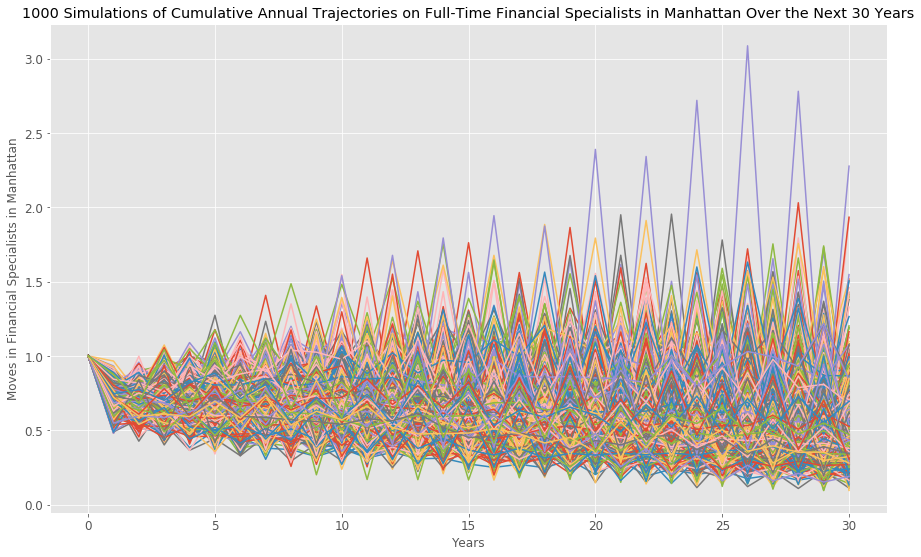

In [416]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Manhattan Over the Next 30 Years"
employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Manhattan')
plt.show()

In [417]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves = employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves.head()

0    0.553003
1    0.367731
2    0.630146
3    1.191513
4    0.587023
Name: 30, dtype: float64

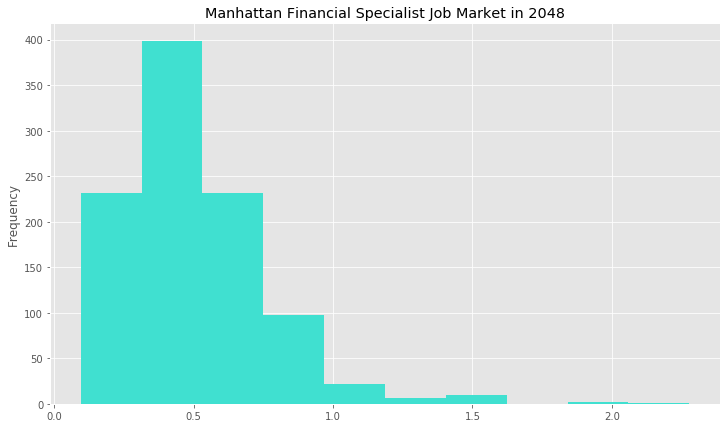

In [418]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
ending_cumulative_moves.plot(kind='hist', bins=10, color = 'turquoise', 
                             title='Manhattan Financial Specialist Job Market in 2048', figsize=(12,7))

In [419]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
ending_cumulative_moves.value_counts(bins=10) / len(ending_cumulative_moves)

(0.313, 0.531]     0.398
(0.0917, 0.313]    0.232
(0.531, 0.75]      0.231
(0.75, 0.968]      0.098
(0.968, 1.186]     0.022
(1.405, 1.623]     0.010
(1.186, 1.405]     0.006
(1.841, 2.059]     0.002
(2.059, 2.278]     0.001
(1.623, 1.841]     0.000
Name: 30, dtype: float64

In [420]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval = ending_cumulative_moves.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.182419
0.975    1.075842
Name: 30, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

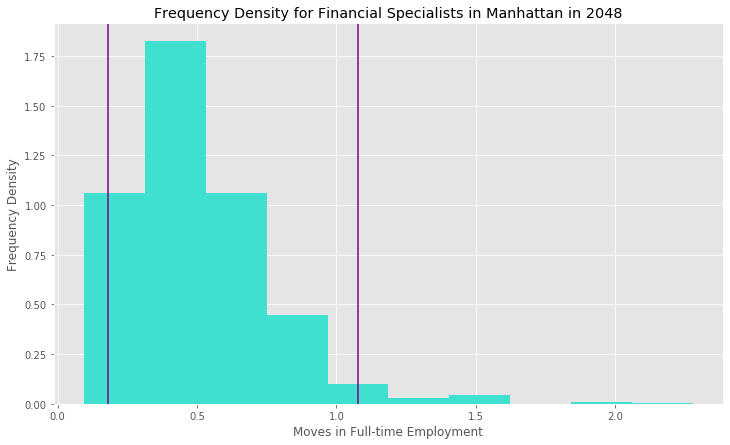

In [421]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_cum_moves = plt.figure()
ending_cumulative_moves.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Frequency Density for Financial Specialists in Manhattan in 2048', figsize=(12,7))
plt.xlabel('Moves in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval.iloc[0], color='purple')
plt.axvline(confidence_interval.iloc[1], color='purple')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

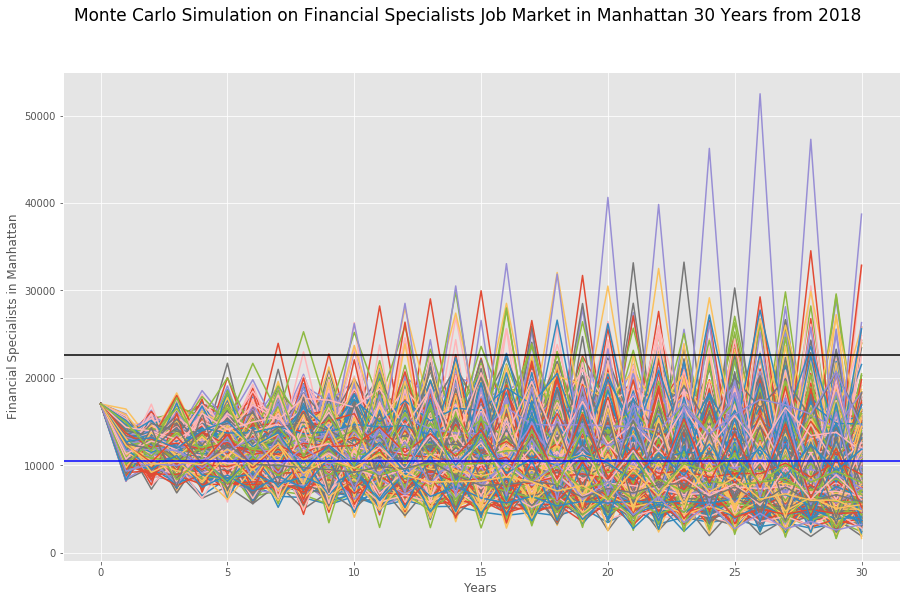

In [422]:
fig_finance = plt.figure(figsize=(15,9))
fig_finance.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Manhattan 30 Years from 2018', fontsize=17)
plt.plot(employed_cumulative_moves*17_000)
plt.axhline(y = financial_specialists_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_specialists_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Manhattan')
plt.show

In [423]:
# Set initial investment
initial_employment = 10000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound = initial_employment * confidence_interval.iloc[0]
employment_gnl_upper_bound = initial_employment * confidence_interval.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of $10,000 in software development"
      f" over the next 30 years will end within in the range of"
      f" ${employment_gnl_lower_bound:,.2f} and ${employment_gnl_upper_bound:,.2f}.")

There is a 95% chance that an initial employment of $10,000 in software development over the next 30 years will end within in the range of $1,824.19 and $10,758.42.


In [424]:
employed_trajectories = 17_000*employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories

,Lower 5%,Median,Upper 5%
0,17000.000000,17000.000000,17000.000000
1,9813.617292,12155.569355,14501.320804
2,9694.191285,12142.844309,14384.935777
3,8767.239368,11677.287654,15390.075819
4,8715.441070,11787.536661,15509.694488
5,7981.204404,11301.579518,15787.379168
6,7766.204073,11419.024519,15885.271533
7,7322.202350,10996.931256,16152.262248
8,7342.797024,11045.267145,16349.189907
9,6684.544722,10654.982057,16468.345357


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

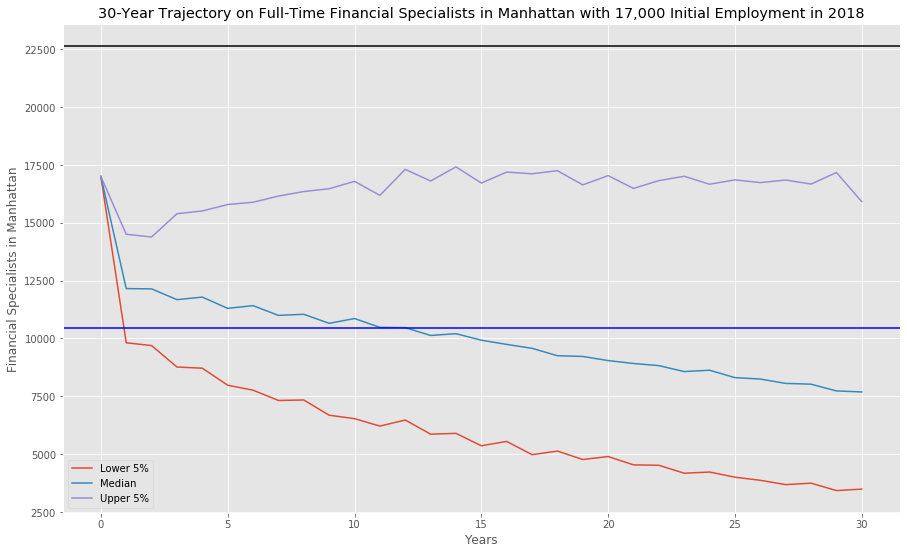

In [425]:
ax_cum_employed = plt.figure()
employed_trajectories.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Manhattan with 17,000 Initial Employment in 2018",
                          figsize=(15, 9)),
plt.axhline(y = financial_specialists_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_specialists_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Manhattan')
plt.show